# Ising Model 

**Author**: Sneha Ramshanker <br> **Date**: 13th December 2019 <br> **Version**: 1

This is the first attempt at applying the Metropolis algorithm to the 2D Ising Model.



### Initialization

We start with a 30 x 30 array with each element representing a magnet with spin +1 (spin up) or -1 (spin down). We configure the array to be all spin up initially. 

### Boundary Conditions

We are simulating a large lattice so we assume periodic boundary conditions 

### Sweeping through Lattice 

We are implementing two methods for sweeping through the lattice

1) Selecting sites at random to flip (Each choice represents a step/sweep)

2) Going through the lattice systematically (Each choice represents a step and probing through the entire lattice represents a sweep)

In [12]:
import numpy as np 
from numpy.random import *
import matplotlib.pyplot as plt 
import pandas as pd 

In [794]:
def calcenergy(lat):
    """
    Input Parameters:
    loc: list[x,y] - list containing location of current sign 
    lat: Numpy Array - current lattice configuration
    J: float - value of J
    B: float - value of magnetic field strength
   
    Output: 
    energy: float - total energy of the configuration
   
    Example use: 
   
    """ 
    energy = 0 
    #Calculating Energy for non-boundary sites 
    for x in range(0, len(lat)-1):
        for y in range(0, len(lat)-1):
            energy = energy+ (-J*(lat[x,y])*(lat[x-1,y]+lat[x+1,y]+lat[x,y-1]+lat[x,y+1])) + (B*lat[x,y]) 
    
    #Calculating Energy for boundary sites 
    #for x = len(lat)
    x = -1 
    for y in range(0, len(lat)-1):
        energy = energy+ (-J*(lat[x,y])*(lat[x-1,y]+lat[x+1,y]+lat[x,y-1]+lat[x,y+1])) + (B*lat[x,y]) 
    #for y = len(lat)
    y = -1 
    for x in range(0, len(lat)-1):
        energy = energy+ (-J*(lat[x,y])*(lat[x-1,y]+lat[x+1,y]+lat[x,y-1]+lat[x,y+1])) + (B*lat[x,y]) 
    #for x and y = len(lat)
    x = -1 
    y = -1
    energy = energy+ (-J*(lat[x,y])*(lat[x-1,y]+lat[x+1,y]+lat[x,y-1]+lat[x,y+1])) + (B*lat[x,y])

    return energy
def weight(lat):
    E = calcenergy(lat)
    return np.exp(-E/(k*T))
def calcr(lat1, lat2):
    return (weight(lat2)/weight(lat1))
def flip(lat,x,y):
    lat_new = np.copy(lat)
    if lat[x,y] == 1:
        lat_new[x,y] = -1 
    else:
        lat_new[x,y] = 1
    return lat_new
def step(lat1,x,y):
    lat2 = flip(lat,x,y)
    r = calcr(lat1,lat2)
    if (r> 1): 
        lat1 = np.copy(lat2)
    else:
        if(rand()<r):
            lat1 = np.copy(lat2)
    return lat1 
def calcmm(lat):
    return np.mean(lat)
def randlatgen(ArrLen, bias = 0.5):
    lat = np.zeros([ArrLen, ArrLen])
    for i in range(0, (ArrLen)):
        for j in range(0, (ArrLen)):
            if (rand()> bias):
                lat[i,j] = 1 
            else:
                lat[i, j] = -1
    return lat 
def seelat(lat):
    latcopy = np.copy(lat)
    #Converting to plotable numbers 
    for i in range(0, len(lat)):
        for j in range(0, len(lat)):
            if lat[i,j] == -1:
                latcopy = 0
            else:
                latcopy = 1 
    plt.imshow(lat, cmap='binary')
 

## Implementing Sweep Method 1

In [764]:
#Defining Constants 
global J 
global B 
global k 
global T 
J = 1
B = 0
k = 1 
T = 4

In [800]:
Tlist = np.linspace(0, 2, 100)
mm_mean = []
for i in range(0, len(Tlist)):
    T = Tlist[i]
    #Initializing 
    ArrLen = 10
    S = [-1,1]
    lat = randlatgen(ArrLen, bias = 0.5) 
    #lat = np.ones([ArrLen, ArrLen])
    N = 2**7
    latfreeze = []


    #Running Scan
    mm = []
    for i in range(0, N):
        [x,y] = [randint(0,ArrLen),randint(0,ArrLen)]
        lat = step(lat,x,y)
        mm.append(calcmm(lat))
    steps = np.linspace(0,N,N)
    mm_mean.append(np.mean(mm))
    """
    #Plotting the graphs 
    plt.plot(steps, (mm), label = 'example')
    plt.xlabel("Steps")
    plt.ylabel("Magnetic Moment")
    plt.legend(bbox_to_anchor=(1.1,1.05))
    """
    

C:\Users\sneha\Anaconda3\lib\site-packages\ipykernel_launcher.py:38: RuntimeWarning: divide by zero encountered in double_scalars
C:\Users\sneha\Anaconda3\lib\site-packages\ipykernel_launcher.py:40: RuntimeWarning: invalid value encountered in double_scalars
C:\Users\sneha\Anaconda3\lib\site-packages\ipykernel_launcher.py:40: RuntimeWarning: divide by zero encountered in double_scalars


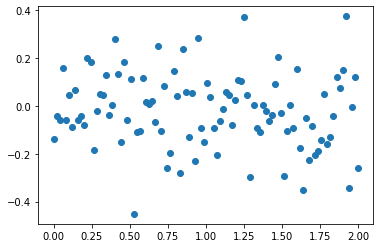

In [801]:
plt.plot(Tlist, (mm_mean), 'o')

In [784]:
np.mean([1,2,3])

2.0